# Import necessary packages

In [1]:
import numpy as np
import simple_util
import matplotlib.pyplot as plt
from test_WO_util import get_optimizer, get_init_obj_constrs
from test_WO_util import get_safe_bo_result, get_constrained_bo_result
from test_WO_util import get_lcb2_result, get_pdbo_result
import os

# Set parameters

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
OURALG = 'CONFIG'
from fig_hp import *

In [3]:
prob_config = simple_util.get_config(problem_name='WO')

{'problem_name': 'WO', 'var_dim': 2, 'discretize_num_list': [100, 100], 'num_constrs': 2, 'bounds': [(4, 7), (70, 100)], 'train_X': array([[  4.,  70.],
       [  7.,  70.],
       [  4., 100.],
       [  7., 100.]]), 'eval_simu': False, 'eta_func': <function get_config.<locals>.<lambda> at 0x7f49ec4c1a60>, 'f_min': -1.559818384308791, 'obj': <function get_config.<locals>.f at 0x7f4a310bfd30>, 'constrs_list': [<function get_config.<locals>.g_1 at 0x7f4a3499fa60>, <function get_config.<locals>.g_2 at 0x7f49ec4c1af0>], 'vio_cost_funcs_list': [<function get_config.<locals>.<lambda> at 0x7f49ec4c1700>, <function get_config.<locals>.<lambda> at 0x7f49ec4c1700>], 'vio_cost_funcs_inv_list': [<function get_config.<locals>.<lambda> at 0x7f49ec4c1820>, <function get_config.<locals>.<lambda> at 0x7f49ec4c1820>], 'init_safe_points': array([[ 5.42424242, 82.12121212]]), 'init_points': array([[ 5.42424242, 82.12121212]]), 'init_safe': False, 'kernel': [<GPy.kern.src.rbf.RBF object at 0x7f4a02397e80>

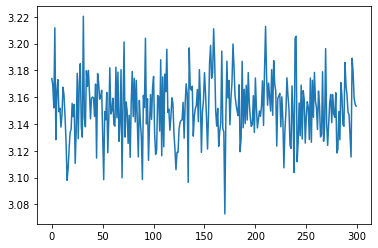

In [5]:

obj_seq = [prob_config['obj'](np.array([[6, 80]])) for k in range(300)]
plt.plot(obj_seq)

# read the data

In [6]:
data = np.load('test_WO_epbo_False_0.2_1.0_3.0_20_15_32-Nov_07_2022.npz', allow_pickle=True)

safe_regret_lists = data['arr_10']
safe_constrs_lists = data['arr_11']

con_bo_regret_lists = data['arr_12']
con_bo_constrs_lists = data['arr_13'] 

pdbo_regret_lists = data['arr_14']
pdbo_constrs_lists = data['arr_15']

lcb2_regret_lists = data['arr_16']
lcb2_constrs_lists = data['arr_17']

epbo_regret_lists_0 = data['arr_18']
epbo_constrs_lists_0 = data['arr_19']

epbo_regret_lists_1 = data['arr_20']
epbo_constrs_lists_1 = data['arr_21']

epbo_regret_lists_2 = data['arr_22']
epbo_constrs_lists_2 = data['arr_23']


(30, 101)

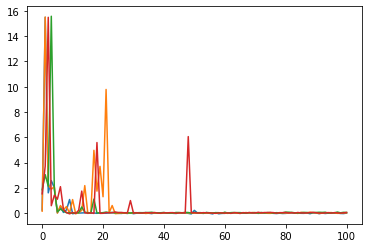

In [7]:
plt.plot(lcb2_regret_lists[0, :])
plt.plot(lcb2_regret_lists[1, :])
plt.plot(lcb2_regret_lists[2, :])
plt.plot(lcb2_regret_lists[3, :])
pdbo_regret_lists.shape

# plot cumulative regrets

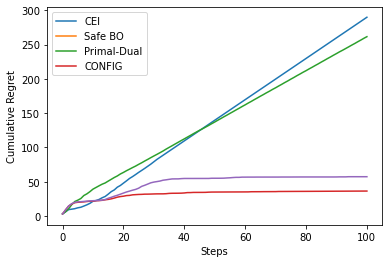

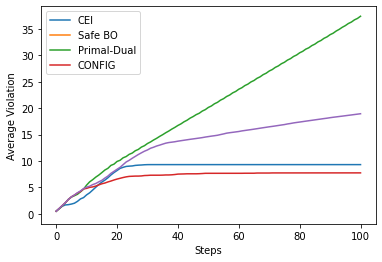

IndexError: index 1 is out of bounds for axis 2 with size 1

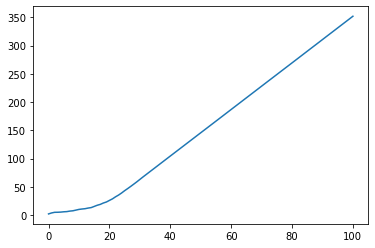

In [8]:
%matplotlib inline
_, total_steps = pdbo_regret_lists.shape
plt.figure()
plt.plot(np.cumsum(np.mean(con_bo_regret_lists, axis=0)))
plt.plot(np.cumsum(np.mean(safe_regret_lists, axis=0)))
plt.plot(np.cumsum(np.mean(pdbo_regret_lists, axis=0)))
plt.plot(np.cumsum(np.mean(lcb2_regret_lists, axis=0)))
plt.plot(np.cumsum(np.mean(epbo_regret_lists_0, axis=0)))
plt.xlabel('Steps')
plt.ylabel('Cumulative Regret')
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', OURALG])
#plt.savefig('./fig/sample_SE_ave_regret.pdf', format='pdf')
plt.show()

plt.figure()
plt.plot(np.cumsum(np.mean(np.maximum(con_bo_constrs_lists[:, :, 0],  0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(-safe_constrs_lists[:, :, 0], 0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(pdbo_constrs_lists[:, :, 0], 0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(lcb2_constrs_lists[:, :, 0], 0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(epbo_constrs_lists_0[:, :, 0], 0), axis=0)))
plt.xlabel('Steps')
plt.ylabel('Average Violation')
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', OURALG])
#plt.savefig('./fig/sample_SE_ave_vio.pdf', format='pdf')
plt.show()

plt.figure()
plt.plot(np.cumsum(np.mean(np.maximum(con_bo_constrs_lists[:, :, 1],  0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(-safe_constrs_lists[:, :, 1], 0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(pdbo_constrs_lists[:, :, 1], 0), axis=0)))
plt.plot(np.cumsum(np.mean(np.maximum(lcb2_constrs_lists[:, :, 1], 0), axis=0)))

plt.xlabel('Steps')
plt.ylabel('Average Violation')
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', OURALG])
#plt.savefig('./fig/sample_SE_ave_vio.pdf', format='pdf')
plt.show()




In [9]:
energy_mean = 385.3506855413606
energy_std = 15.832128159177238
dev_mean = 0.48119964518630765
dev_std = 0.016940298884339722

# draw approximately feasible optimal solution

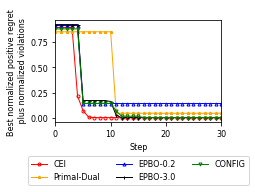

In [10]:
instance_id = 0
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
   
    step_arr = np.arange(total_steps)
    
    shift = 0 
    con_bo_best_regret_constr_lists = np.minimum.accumulate(
        np.maximum(con_bo_regret_lists, 0) + np.maximum(con_bo_constrs_lists[:, :, 0], 0)+
        np.maximum(con_bo_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    #safe_best_regret_constr_lists = np.minimum.accumulate(
    #    np.maximum(safe_regret_lists, 0) + np.maximum(-safe_constrs_lists[:, :, 0], 0)+
    #    np.maximum(-safe_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    pdbo_best_regret_constr_lists = np.minimum.accumulate(
        np.maximum(pdbo_regret_lists, 0) + np.maximum(pdbo_constrs_lists[:, :, 0], 0)+
        np.maximum(pdbo_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    lcb2_best_regret_constr_lists = np.minimum.accumulate(
        np.maximum(lcb2_regret_lists, 0) + np.maximum(lcb2_constrs_lists[:, :, 0], 0)+
        np.maximum(lcb2_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    epbo_best_regret_constr_lists_0 = np.minimum.accumulate(
        np.maximum(epbo_regret_lists_0, 0) + np.maximum(epbo_constrs_lists_0[:, :, 0], 0)+
        np.maximum(epbo_constrs_lists_0[:, :, 1], 0)+shift, axis=1)
    
    epbo_best_regret_constr_lists_1 = np.minimum.accumulate(
        np.maximum(epbo_regret_lists_1, 0) + np.maximum(epbo_constrs_lists_1[:, :, 0], 0)+
        np.maximum(epbo_constrs_lists_1[:, :, 1], 0)+shift, axis=1)
        
    epbo_best_regret_constr_lists_2 = np.minimum.accumulate(
        np.maximum(epbo_regret_lists_2, 0) + np.maximum(epbo_constrs_lists_2[:, :, 0], 0)+
        np.maximum(epbo_constrs_lists_2[:, :, 1], 0)+shift, axis=1)
    
    %matplotlib inline
 
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes
    plt.plot(step_arr, con_bo_best_regret_constr_lists[instance_id, :],
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    #plt.plot(step_arr, safe_best_regret_constr_lists[instance_id, :],
    #                     linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plt.plot(step_arr, pdbo_best_regret_constr_lists[instance_id, :],
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    
    plt.plot(step_arr, epbo_best_regret_constr_lists_0[instance_id, :],
                         linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    plt.plot(step_arr, epbo_best_regret_constr_lists_2[instance_id, :],
                         linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    
    plt.plot(step_arr, lcb2_best_regret_constr_lists[instance_id, :],
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
   
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Best normalized positive regret \n plus normalized violations', fontsize=LABELSIZE)  

    plt.xlim((0, 30))
    
   
    ax.legend(['CEI' ,'Primal-Dual', f'EPBO-{0.2}', f'EPBO-{3.0}', OURALG], loc='lower center', bbox_to_anchor=(0.25, -0.65, 0.5, 0.5),
             ncol=3, fontsize=LABELSIZE)


    plt.savefig('./figs/WO_funcs_r_and_v_with_epbo.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


In [11]:
safe_constrs_lists.shape

(30, 1, 1)

In [12]:
pdbo_best_regret_constr_lists = np.minimum.accumulate(
        np.maximum(pdbo_regret_lists, 0) + np.maximum(pdbo_constrs_lists[:, :, 0], 0)+
        np.maximum(pdbo_constrs_lists[:, :, 1], 0), axis=1)
pdbo_regret_lists

array([[0.24138828, 0.63378439, 1.40713478, ..., 2.06318447, 2.97107276,
        2.05253389],
       [0.17059899, 0.30612626, 5.44601065, ..., 2.89521959, 2.10187427,
        2.87243342],
       [1.85253107, 3.03454204, 2.13397791, ..., 2.07774365, 2.06204253,
        2.11220615],
       ...,
       [2.45446892, 2.98885794, 6.48794005, ..., 3.01226787, 2.07371795,
        2.99668536],
       [2.36054871, 2.96248031, 2.11584573, ..., 2.13378626, 2.63361309,
        2.14335808],
       [0.21804323, 0.12757118, 5.21657604, ..., 2.12731975, 2.99284574,
        2.11097669]])

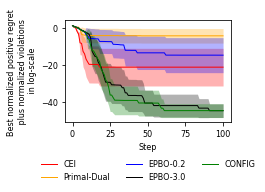

In [17]:
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color']) #, marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'], linewidth=0.0)
    return aver_line, aver_region

def scale_transform(r_c_lists):
    return np.log(np.maximum(r_c_lists, 1e-20))

def plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
   
    step_arr = np.arange(total_steps)
    
    shift = 0 
    con_bo_best_regret_constr_lists = scale_transform(np.minimum.accumulate(
        np.maximum(con_bo_regret_lists, 0) + np.maximum(con_bo_constrs_lists[:, :, 0], 0)+
        np.maximum(con_bo_constrs_lists[:, :, 1], 0)+shift, axis=1))
    
    #safe_best_regret_constr_lists = np.minimum.accumulate(
    #    np.maximum(safe_regret_lists, 0) + np.maximum(safe_constrs_lists[:, :, 0], 0)+
    #    np.maximum(safe_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    pdbo_best_regret_constr_lists = scale_transform(np.minimum.accumulate(
        np.maximum(pdbo_regret_lists, 0) + np.maximum(pdbo_constrs_lists[:, :, 0], 0)+
        np.maximum(pdbo_constrs_lists[:, :, 1], 0)+shift, axis=1))
    
    lcb2_best_regret_constr_lists = scale_transform(np.minimum.accumulate(
        np.maximum(lcb2_regret_lists, 0) + np.maximum(lcb2_constrs_lists[:, :, 0], 0)+
        np.maximum(lcb2_constrs_lists[:, :, 1], 0)+shift, axis=1))
    
    epbo_best_regret_constr_lists_0 = scale_transform(np.minimum.accumulate(
        np.maximum(epbo_regret_lists_0, 0) + np.maximum(epbo_constrs_lists_0[:, :, 0], 0)+
        np.maximum(epbo_constrs_lists_0[:, :, 1], 0)+shift, axis=1))
    
    epbo_best_regret_constr_lists_1 = scale_transform(np.minimum.accumulate(
        np.maximum(epbo_regret_lists_1, 0) + np.maximum(epbo_constrs_lists_1[:, :, 0], 0)+
        np.maximum(epbo_constrs_lists_1[:, :, 1], 0)+shift, axis=1))
        
    epbo_best_regret_constr_lists_2 = scale_transform(np.minimum.accumulate(
        np.maximum(epbo_regret_lists_2, 0) + np.maximum(epbo_constrs_lists_2[:, :, 0], 0)+
        np.maximum(epbo_constrs_lists_2[:, :, 1], 0)+shift, axis=1))
    
    %matplotlib inline
 
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes
    beta = 0.5
    plot_with_shade_area(ax, step_arr, np.mean(con_bo_best_regret_constr_lists, axis=0), beta * np.std(con_bo_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[0]) #, marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    #plot_with_shade_area(ax, step_arr, np.mean(safe_best_regret_constr_lists, axis=0), np.std(safe_best_regret_constr_lists, axis=0),
    #                     linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, np.mean(pdbo_best_regret_constr_lists, axis=0), beta * np.std(pdbo_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[2]) #, marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    
    #plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_0, axis=0), beta *np.std(epbo_best_regret_constr_lists_0, axis=0),
    #                     linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_0, axis=0), beta *np.std(epbo_best_regret_constr_lists_0, axis=0),
                         linewidth=LINEWIDTH, color=colors[4]) #, marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_2, axis=0), beta *np.std(epbo_best_regret_constr_lists_2, axis=0),
                         linewidth=LINEWIDTH, color=colors[5]) #, marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(lcb2_best_regret_constr_lists, axis=0), beta *np.std(lcb2_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[3]) #, marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
   
    
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Best normalized positive regret \n plus normalized violations \n in log-scale', fontsize=LABELSIZE)  
    #plt.xlim((0, 30))
      
    leg = ax.legend(['CEI', 'Primal-Dual', f'EPBO-{0.2}', f'EPBO-{3.0}', OURALG], loc='lower center', bbox_to_anchor=(0.25, -0.65, 0.5, 0.5),
             ncol=3, fontsize=LABELSIZE)
    leg.get_frame().set_linewidth(0.0)

    plt.savefig('./figs/WO_funcs_r_and_v_with_epbo_log_avg.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()  
    
plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


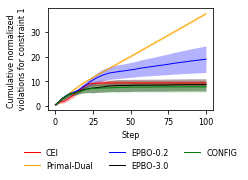

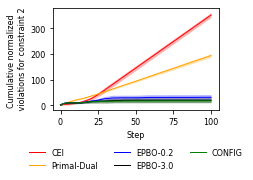

In [18]:
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color']) #, marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'], linewidth=0.0)
    return aver_line, aver_region

def scale_transform(r_c_lists):
    return r_c_lists #np.log(np.maximum(r_c_lists, 1e-20))

def plot_cumu_vio_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists, constr_id):
    num_traj, total_steps = pdbo_regret_lists.shape
   
    step_arr = np.arange(total_steps)
    
    shift = 0 
    con_bo_best_regret_constr_lists = scale_transform(np.cumsum(
        np.maximum(con_bo_constrs_lists[:, :, constr_id], 0)+shift, axis=1))
    
    #safe_best_regret_constr_lists = np.minimum.accumulate(
    #    np.maximum(safe_regret_lists, 0) + np.maximum(safe_constrs_lists[:, :, 0], 0)+
    #    np.maximum(safe_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    pdbo_best_regret_constr_lists = scale_transform(np.cumsum(
        np.maximum(pdbo_constrs_lists[:, :, constr_id], 0)+shift, axis=1))
    
    lcb2_best_regret_constr_lists = scale_transform(np.cumsum(
        np.maximum(lcb2_constrs_lists[:, :, constr_id], 0)+shift, axis=1))
    
    epbo_best_regret_constr_lists_0 = scale_transform(np.cumsum(
        np.maximum(epbo_constrs_lists_0[:, :, constr_id], 0)+shift, axis=1))
    
    epbo_best_regret_constr_lists_1 = scale_transform(np.cumsum(
      np.maximum(epbo_constrs_lists_1[:, :, constr_id], 0)+shift, axis=1))
        
    epbo_best_regret_constr_lists_2 = scale_transform(np.cumsum(
        np.maximum(epbo_constrs_lists_2[:, :, constr_id], 0)+shift, axis=1))
    
    %matplotlib inline
 
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes
    beta = 1
    plot_with_shade_area(ax, step_arr, np.mean(con_bo_best_regret_constr_lists, axis=0), beta * np.std(con_bo_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    #plot_with_shade_area(ax, step_arr, np.mean(safe_best_regret_constr_lists, axis=0), np.std(safe_best_regret_constr_lists, axis=0),
    #                     linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, np.mean(pdbo_best_regret_constr_lists, axis=0), beta * np.std(pdbo_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    
    #plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_0, axis=0), beta *np.std(epbo_best_regret_constr_lists_0, axis=0),
    #                     linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_0, axis=0), beta *np.std(epbo_best_regret_constr_lists_0, axis=0),
                         linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_2, axis=0), beta *np.std(epbo_best_regret_constr_lists_2, axis=0),
                         linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(lcb2_best_regret_constr_lists, axis=0), beta *np.std(lcb2_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
   
    
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel(f'Cumulative normalized \n violations for constraint {constr_id+1}', fontsize=LABELSIZE)  
    #plt.xlim((0, 30))
    #plt.ylim((0, 20))
    leg = ax.legend(['CEI', 'Primal-Dual', f'EPBO-{0.2}', f'EPBO-{3.0}', OURALG], loc='lower center', bbox_to_anchor=(0.25, -0.65, 0.5, 0.5),
             ncol=3, fontsize=LABELSIZE)
    leg.get_frame().set_linewidth(0.0)

    plt.savefig(f'./figs/WO_funcs_V_{constr_id+1}_with_epbo_avg.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()  
    
plot_cumu_vio_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists, 0)

plot_cumu_vio_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists, 1)


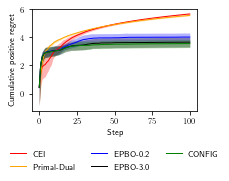

In [20]:
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color']) # marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'], linewidth=0.0)
    return aver_line, aver_region

def scale_transform(r_c_lists):
    return np.log(np.maximum(r_c_lists, 1e-20))

def plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
   
    step_arr = np.arange(total_steps)
    
    shift = 0 
    con_bo_best_regret_constr_lists = scale_transform(np.cumsum(
        np.maximum(con_bo_regret_lists, 0)+shift, axis=1))
    
    #safe_best_regret_constr_lists = np.minimum.accumulate(
    #    np.maximum(safe_regret_lists, 0) + np.maximum(safe_constrs_lists[:, :, 0], 0)+
    #    np.maximum(safe_constrs_lists[:, :, 1], 0)+shift, axis=1)
    
    pdbo_best_regret_constr_lists = scale_transform(np.cumsum(
        np.maximum(pdbo_regret_lists, 0) +shift, axis=1))
    
    lcb2_best_regret_constr_lists = scale_transform(np.cumsum(
        np.maximum(lcb2_regret_lists, 0) +shift, axis=1))
    
    epbo_best_regret_constr_lists_0 = scale_transform(np.cumsum(
        np.maximum(epbo_regret_lists_0, 0) +shift, axis=1))
    
    epbo_best_regret_constr_lists_1 = scale_transform(np.cumsum(
        np.maximum(epbo_regret_lists_1, 0)+shift, axis=1))
        
    epbo_best_regret_constr_lists_2 = scale_transform(np.cumsum(
        np.maximum(epbo_regret_lists_2, 0) +shift, axis=1))
    
    %matplotlib inline
 
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes
    beta = 1
    plot_with_shade_area(ax, step_arr, np.mean(con_bo_best_regret_constr_lists, axis=0), beta * np.std(con_bo_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    #plot_with_shade_area(ax, step_arr, np.mean(safe_best_regret_constr_lists, axis=0), np.std(safe_best_regret_constr_lists, axis=0),
    #                     linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, np.mean(pdbo_best_regret_constr_lists, axis=0), beta * np.std(pdbo_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    
    #plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_0, axis=0), beta *np.std(epbo_best_regret_constr_lists_0, axis=0),
    #                     linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_0, axis=0), beta *np.std(epbo_best_regret_constr_lists_0, axis=0),
                         linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(epbo_best_regret_constr_lists_2, axis=0), beta *np.std(epbo_best_regret_constr_lists_2, axis=0),
                         linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, np.mean(lcb2_best_regret_constr_lists, axis=0), beta *np.std(lcb2_best_regret_constr_lists, axis=0),
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
   
    
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    plt.rcParams.update({
    "text.usetex": True
})
    ax.set_ylabel('Cumulative positive regret', fontsize=LABELSIZE)  
    #plt.xlim((0, 30))
      
    leg = ax.legend(['CEI', 'Primal-Dual', f'EPBO-{0.2}', f'EPBO-{3.0}', OURALG], loc='lower center', bbox_to_anchor=(0.25, -0.65, 0.5, 0.5),
             ncol=3, fontsize=LABELSIZE)
    leg.get_frame().set_linewidth(0.0)

    plt.savefig('./figs/WO_funcs_R_with_epbo_avg.png', format='png', bbox_inches='tight', dpi=300)
    plt.show()  
    
plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


In [30]:
con_bo_regret_lists.shape

(30, 101)

# Plot contour figure

In [ ]:
WO_problem_config = simple_util.get_config(problem_name='WO')

In [ ]:
WO_problem_config['active_points']

In [ ]:
plt.scatter(WO_problem_config['active_points'][0][:, 0], WO_problem_config['active_points'][0][:, 1])